In [289]:
from tkinter import Label

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [290]:
df_energy = pd.read_csv("datasets/spanish-cities-energy-consumption/energy_dataset.csv", parse_dates=["time"])
df_weather = pd.read_csv("datasets/spanish-cities-energy-consumption/weather_features.csv", parse_dates=["dt_iso"])

df_weather.rename(columns={"dt_iso": "time"}, inplace=True)

df_energy.set_index("time", inplace=True)
df_weather.set_index("time", inplace=True)

df_energy = df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], 
                            axis=1)

df_weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [291]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other                 

In [292]:
print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

temp_energy = df_energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


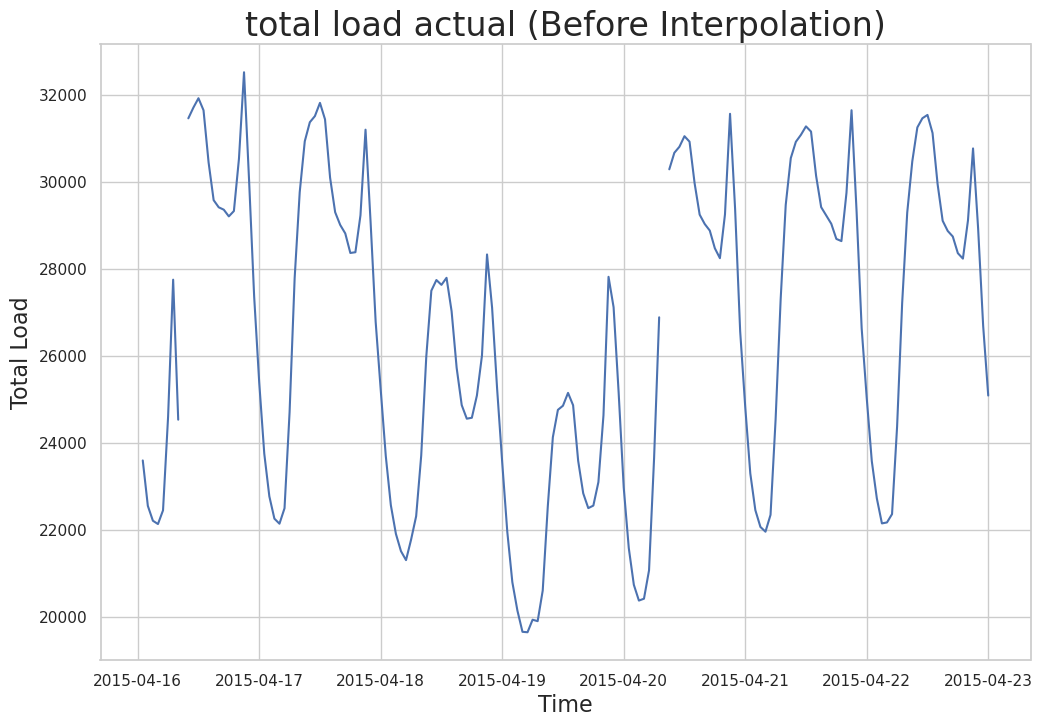

In [293]:
def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set_theme(style="whitegrid", font_scale=1)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    
    ax.grid(True)
    return ax

ax = plot_series(df=df_energy, column='total load actual', ylabel='Total Load',
                 title='total load actual (Before Interpolation)', start=24*7*15, end=24*7*16)
plt.show()

In [294]:
df_energy[df_energy.isnull().any(axis=1)]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21182.0,35.20,59.68
2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,79.14
2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.80,73.95
2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.50,71.93
2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.50
2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.85
2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.60,80.53
2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39304.0,70.01,88.95
2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39262.0,69.00,87.94


In [295]:
df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


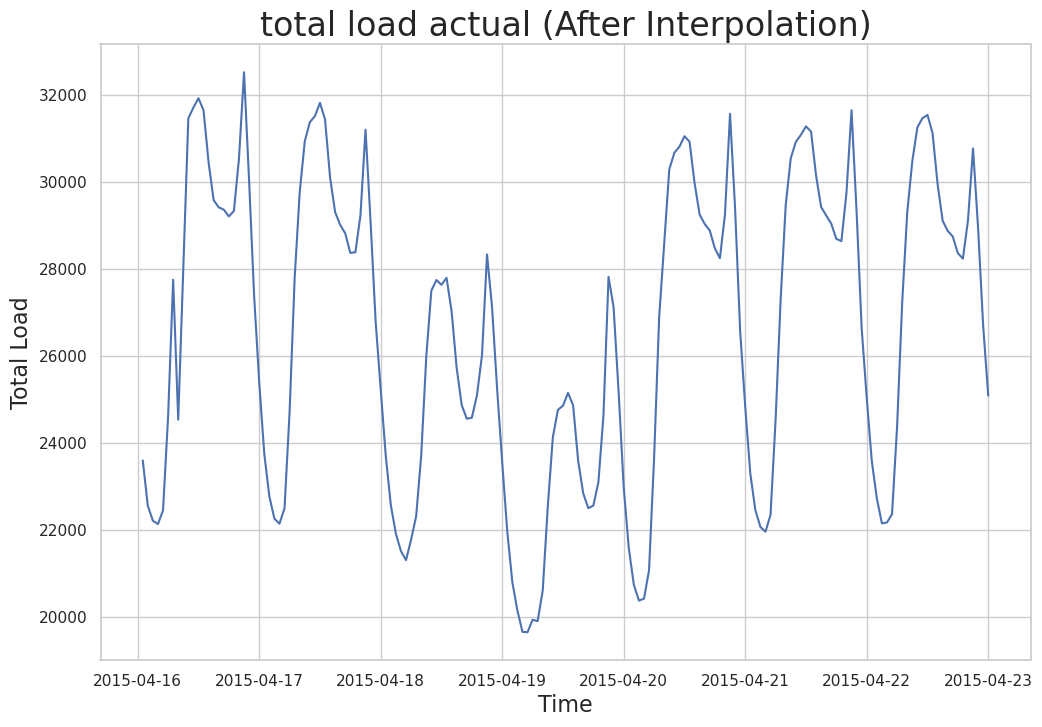

In [296]:
print('Non-zero values in each column:\n', df_energy.astype(bool).sum(axis=0), sep='\n')
ax2 = plot_series(df=df_energy, column='total load actual', ylabel='Total Load',
                 title='total load actual (After Interpolation)', start=24*7*15, end=24*7*16)
plt.show()

In [297]:
df_energy.count()

generation biomass                             35064
generation fossil brown coal/lignite           35064
generation fossil gas                          35064
generation fossil hard coal                    35064
generation fossil oil                          35064
generation hydro pumped storage consumption    35064
generation hydro run-of-river and poundage     35064
generation hydro water reservoir               35064
generation nuclear                             35064
generation other                               35064
generation other renewable                     35064
generation solar                               35064
generation waste                               35064
generation wind onshore                        35064
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64

In [298]:
df_weather.drop(columns=["weather_icon"], inplace=True)

In [299]:
df_weather

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description
time,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear


In [300]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

In [301]:
print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

cities = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.


In [302]:
df_weather_2 = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='last').set_index('time')

df_weather = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.


In [303]:
print(len(df_weather["weather_main"].unique()))
print(len(df_weather["weather_description"].unique()))
print(len(df_weather["weather_id"].unique()))
print(np.sort(df_weather["weather_id"].unique()))

12
41
37
[200. 201. 202. 210. 211. 300. 301. 302. 310. 311. 500. 501. 502. 503.
 520. 521. 522. 531. 600. 601. 602. 611. 615. 616. 620. 701. 711. 721.
 731. 741. 761. 771. 800. 801. 802. 803. 804.]


In [304]:
df_weather["weather_main"].unique()
df_weather["weather_description"].unique()

for id in df_weather["weather_id"].unique():
    if len(df_weather[df_weather["weather_id"] == id]["weather_description"].unique()) > 1:
        print("ID:", id, df_weather[df_weather["weather_id"] == id]["weather_description"].unique())
        

ID: 501.0 ['moderate rain' 'proximity moderate rain']
ID: 521.0 ['shower rain' 'proximity shower rain']
ID: 211.0 ['proximity thunderstorm' 'thunderstorm']
ID: 301.0 ['drizzle' 'proximity drizzle']


In [305]:
df_weather.loc[df_weather["weather_description"] == "proximity moderate rain", "weather_id"] = 504.0
df_weather.loc[df_weather["weather_description"] == "proximity shower rain", "weather_id"] = 523.0
df_weather.loc[df_weather["weather_description"] == "proximity thunderstorm", "weather_id"] = 212.0
df_weather.loc[df_weather["weather_description"] == "proximity drizzle", "weather_id"] = 303.0

In [306]:
print(len(df_weather["weather_main"].unique()))
print(len(df_weather["weather_description"].unique()))
print(len(df_weather["weather_id"].unique()))
print(np.sort(df_weather["weather_id"].unique()))

for id in df_weather["weather_id"].unique():
    if len(df_weather[df_weather["weather_id"] == id]["weather_description"].unique()) > 1:
        print("ID:", id, df_weather[df_weather["weather_id"] == id]["weather_description"].unique())

12
41
41
[200. 201. 202. 210. 211. 212. 300. 301. 302. 303. 310. 311. 500. 501.
 502. 503. 504. 520. 521. 522. 523. 531. 600. 601. 602. 611. 615. 616.
 620. 701. 711. 721. 731. 741. 761. 771. 800. 801. 802. 803. 804.]


In [307]:
print(len(df_weather["weather_main"].unique()))
print(len(df_weather["weather_description"].unique()))
print(len(df_weather["weather_id"].unique()))
print(np.sort(df_weather["weather_id"].unique()))

12
41
41
[200. 201. 202. 210. 211. 212. 300. 301. 302. 303. 310. 311. 500. 501.
 502. 503. 504. 520. 521. 522. 523. 531. 600. 601. 602. 611. 615. 616.
 620. 701. 711. 721. 731. 741. 761. 771. 800. 801. 802. 803. 804.]


In [308]:
df_weather.drop(columns=["weather_main", "weather_description"], inplace=True)

In [309]:
df_weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
time,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0
2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0
2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0
2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0
2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0


In [310]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_weather["city_name"] = le.fit_transform(df_weather["city_name"])

In [311]:
print(le.classes_)
(df_weather.describe().round(2))
df_weather.info()

def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df


df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

df_weather.info()

[' Barcelona' 'Bilbao' 'Madrid' 'Seville' 'Valencia']
<class 'pandas.core.frame.DataFrame'>
Index: 175320 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  int64  
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    175320 non-null  float64
 5   humidity    175320 non-null  float64
 6   wind_speed  175320 non-null  float64
 7   wind_deg    175320 non-null  float64
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  float64
 12  weather_id  175320 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 22.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 175320 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:0

In [312]:
df_weather.describe().round(2)

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00,175320.00
mean,2.00,289.71,288.43,291.17,1070.20,68.03,2.47,166.72,0.07,0.00,0.00,24.34,763.46
std,1.41,8.02,7.95,8.61,6021.77,21.84,2.10,116.55,0.39,0.01,0.22,30.34,103.10
min,0.00,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,1.00,283.83,282.78,284.91,1013.00,53.00,1.00,56.00,0.00,0.00,0.00,0.00,800.00
50%,2.00,289.15,288.15,290.15,1018.00,72.00,2.00,178.00,0.00,0.00,0.00,16.00,800.00
75%,3.00,295.24,294.15,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,4.00,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


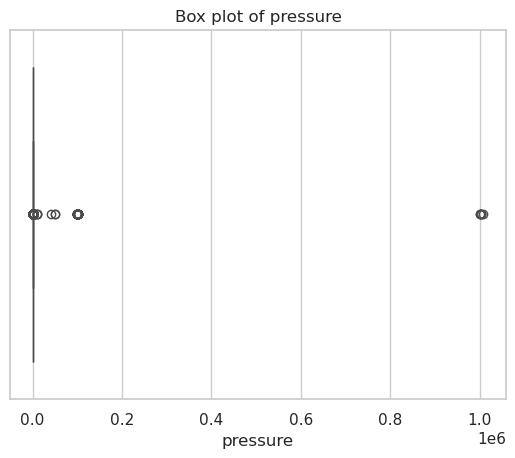

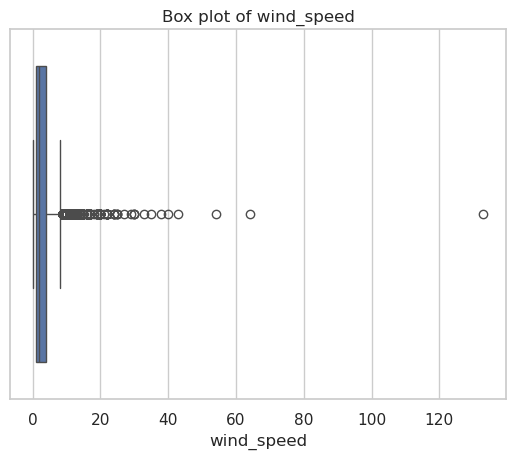

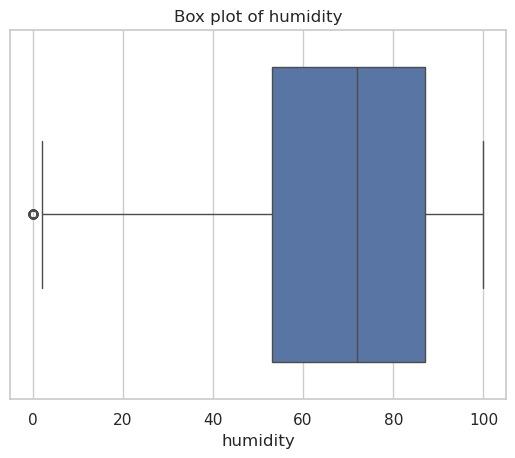

In [313]:
sns.boxplot(x=df_weather["pressure"])
plt.title("Box plot of pressure")
plt.show()

sns.boxplot(x=df_weather["wind_speed"])
plt.title("Box plot of wind_speed")
plt.show()

sns.boxplot(x=df_weather["humidity"])
plt.title("Box plot of humidity")
plt.show()

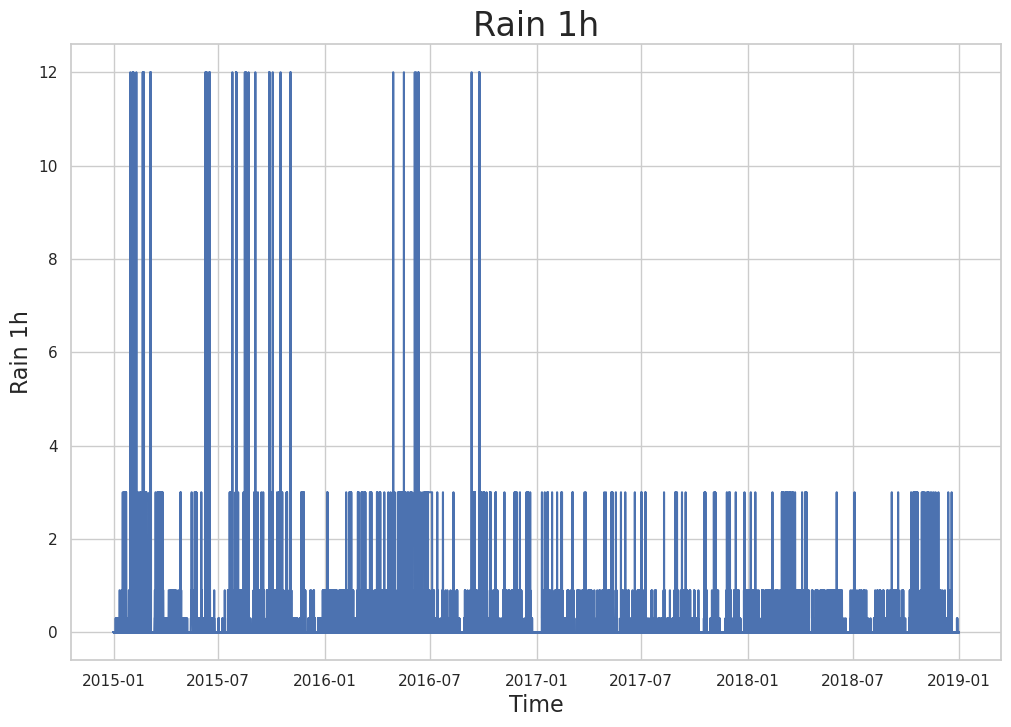

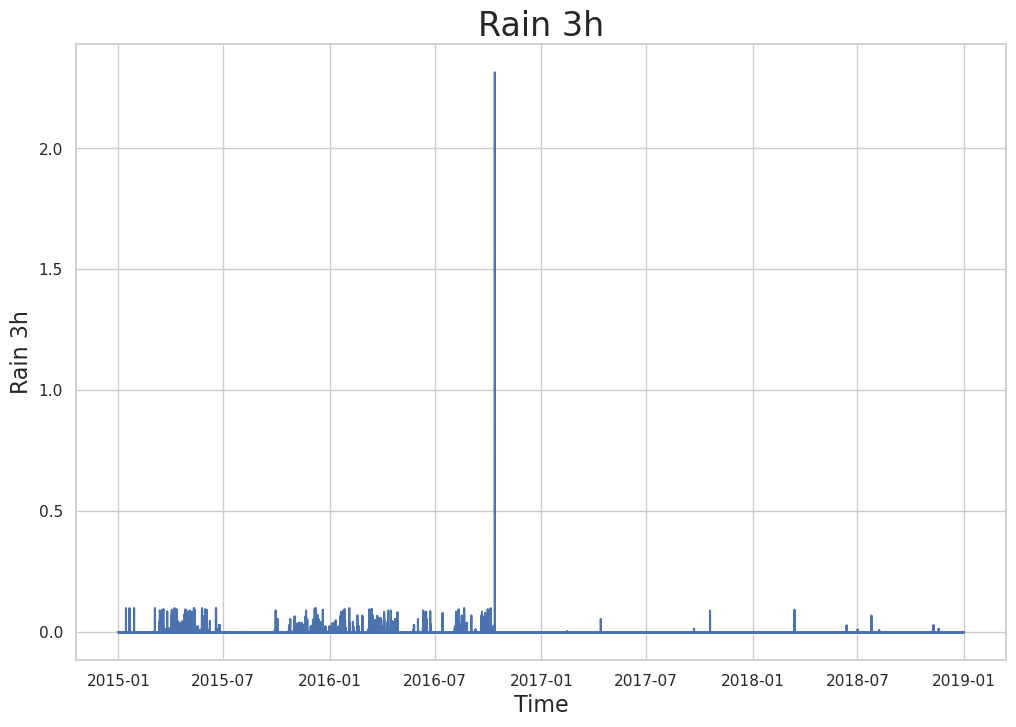

In [314]:
ax3 = plot_series(df=df_weather, column='rain_1h', ylabel='Rain 1h',
                 title='Rain 1h')
ax4 = plot_series(df=df_weather, column='rain_3h', ylabel='Rain 3h',
                 title='Rain 3h')

In [315]:
df_weather.drop(columns=["rain_3h"], inplace=True)

In [316]:
df_weather.loc[df_weather["pressure"] < 950, "pressure"] = np.nan
df_weather.loc[df_weather["pressure"] > 1051, "pressure"] = np.nan
df_weather.loc[df_weather["humidity"] < 3, "humidity"] = np.nan
df_weather.loc[df_weather["wind_speed"] > 50, "wind_speed"] = np.nan
df_weather.interpolate(method='linear', limit_direction='forward', inplace=True)

In [317]:
print('There are {} missing values or NaNs in df_final.'
      .format(df_weather.isnull().values.sum()))

There are 0 missing values or NaNs in df_final.


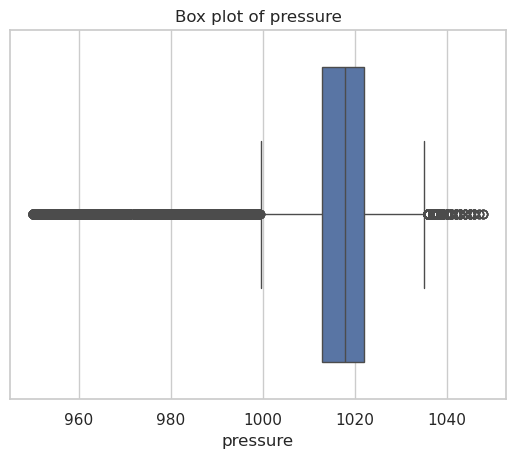

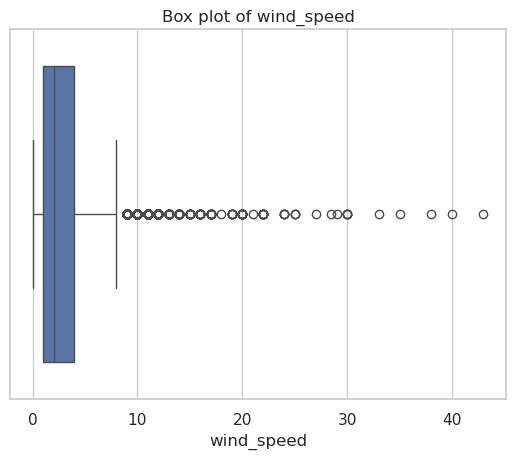

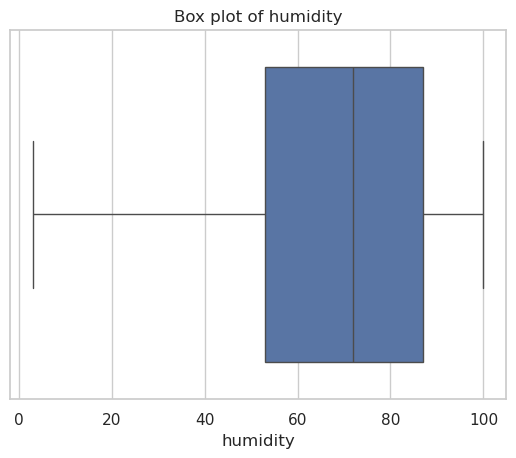

In [318]:
sns.boxplot(x=df_weather["pressure"])
plt.title("Box plot of pressure")
plt.show()

sns.boxplot(x=df_weather["wind_speed"])
plt.title("Box plot of wind_speed")
plt.show()

sns.boxplot(x=df_weather["humidity"])
plt.title("Box plot of humidity")
plt.show()

In [319]:
df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [320]:
df_final = df_energy

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace(".", "")
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'snow_3h_0', 'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1',
       'temp_max_1', 'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1',
       'rain_1h_1', 'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2',
       'temp_min_2', 'temp_max_2', 'pressure_2', 'humidity_2', 'wind_speed_2',
       'wind_deg_2', 'rain_1h_2', 'snow_3h_2', 'clou

In [328]:
print(df_final.shape)

print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))  

(35064, 72)
There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


In [331]:
df_final.to_csv("df_combined.csv")

Not used for anything in the report:

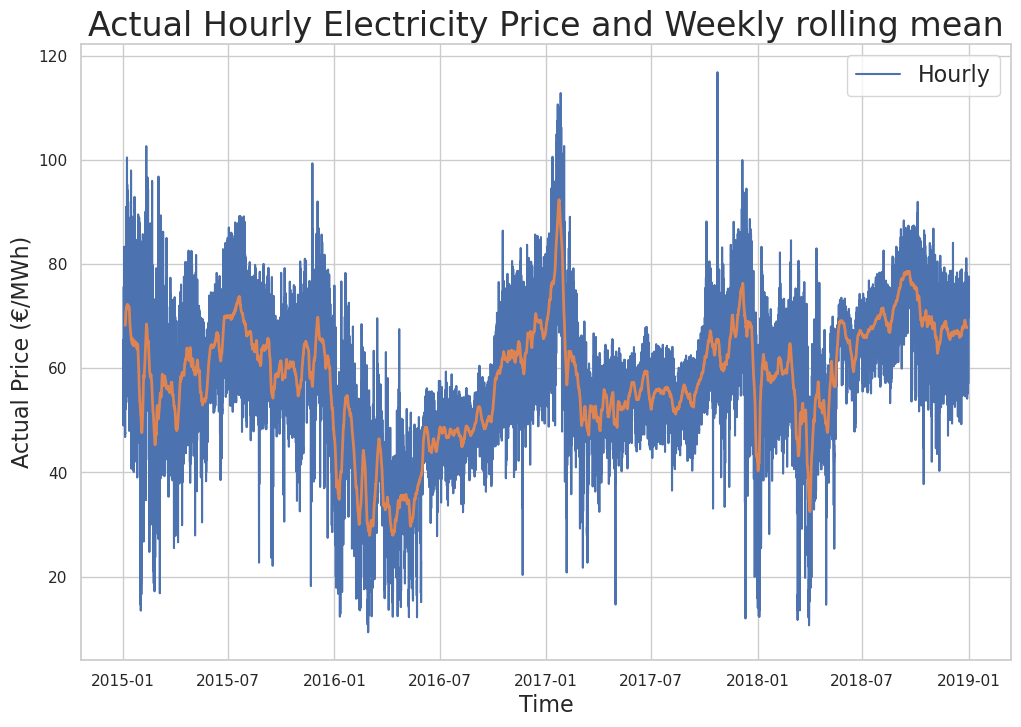

In [329]:
rolling = df_final['price actual'].rolling(24*7, center=True).mean()
ax = plot_series(df_final, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

/tmp/ipykernel_223575/1942217739.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df_final['price actual'].asfreq('M')
/tmp/ipykernel_223575/1942217739.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shifted = df_final['price actual'].asfreq('M').shift(12)


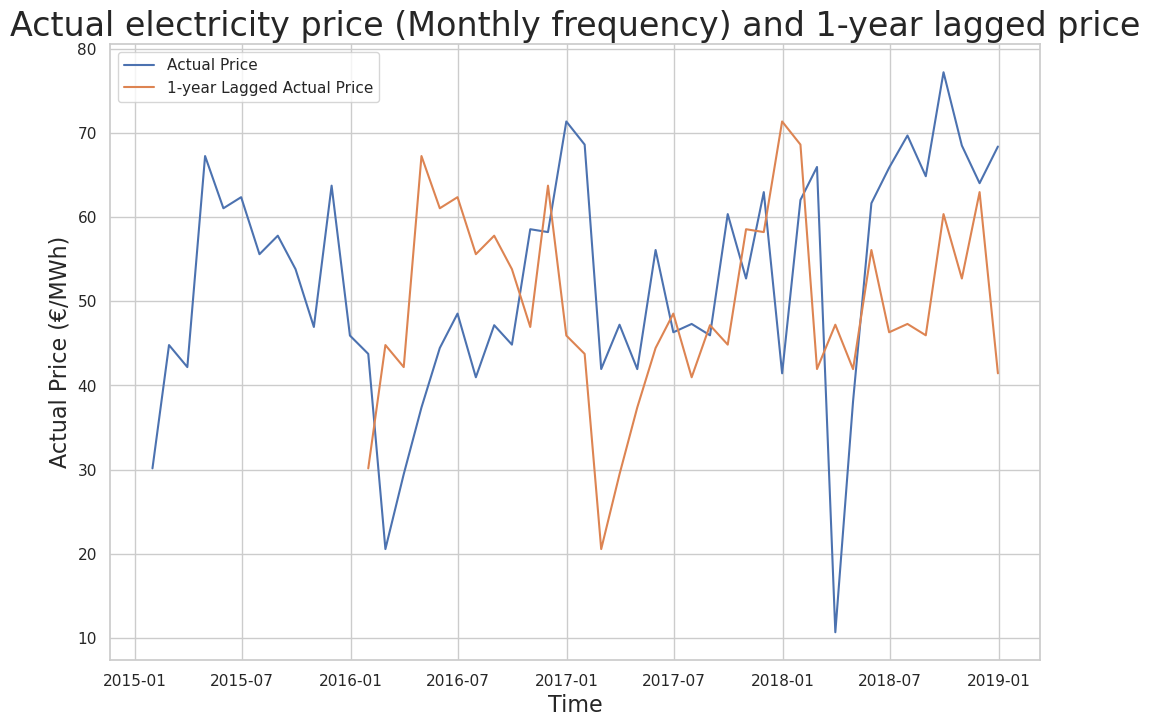

In [330]:
monthly_price = df_final['price actual'].asfreq('M')
ax = plot_series(series=monthly_price, ylabel='Actual Price (€/MWh)',
                 title='Actual electricity price (Monthly frequency) and 1-year lagged price')
shifted = df_final['price actual'].asfreq('M').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend(['Actual Price', '1-year Lagged Actual Price'])
plt.show()